In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from plotly.offline import init_notebook_mode
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("autism_screening.csv")

In [4]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [5]:
df.shape

(704, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [7]:
df["ethnicity"].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

In [8]:
df["ethnicity"] = df["ethnicity"].str.replace("others", "Others")
df["ethnicity"] = df["ethnicity"].str.replace("?", "Others")

In [9]:
#jundice - austim - used_app_before - Class/ASD
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})
df["used_app_before"] = df["used_app_before"].map({"no": 0, "yes": 1})

In [10]:
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})

In [12]:
classes = df["Class/ASD"].value_counts()

values = classes.values
names = classes.index

fig = px.pie(df, values=values, names=names, hole=0.5)
fig.show()

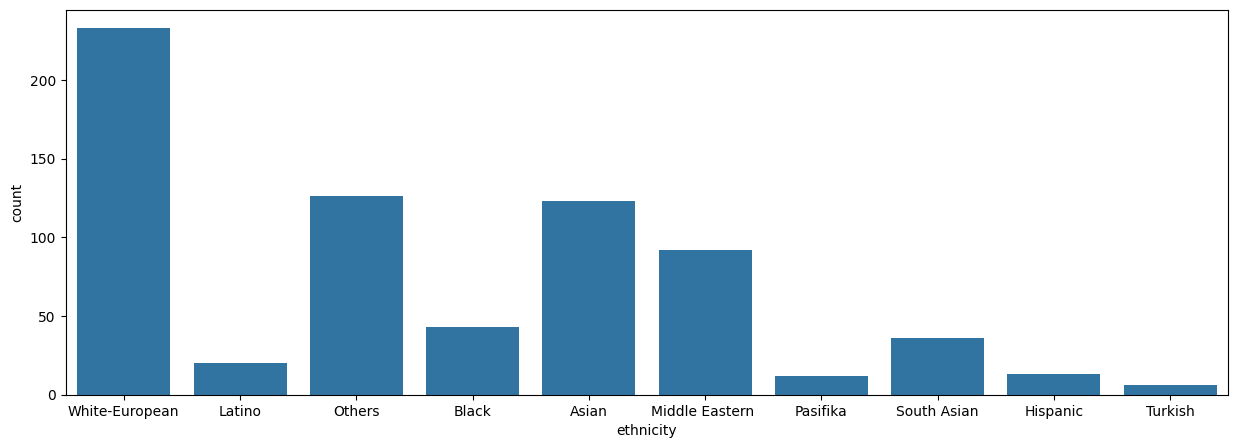

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["ethnicity"])
plt.show()

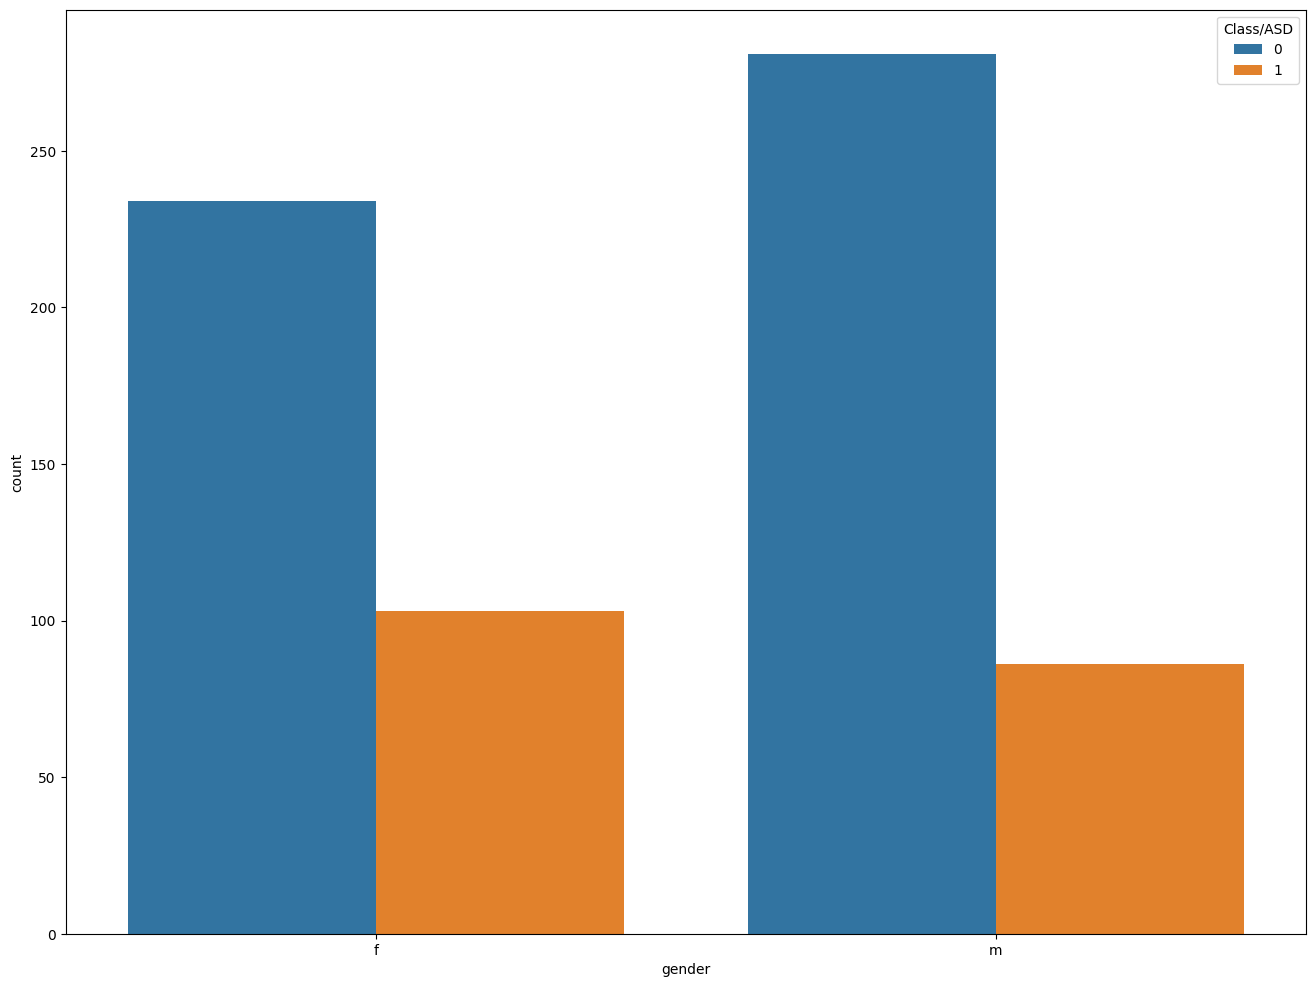

In [14]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df["gender"], hue=df["Class/ASD"])
plt.show()

In [15]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [16]:
df = df.dropna(how="any")

In [17]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,0,0,Egypt,0,2.0,18 and more,?,0


In [18]:
df["relation"].value_counts()

relation
Self                        522
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [19]:
df["relation"] = df["relation"].str.replace("?", "Others")

In [20]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,0,0,Egypt,0,2.0,18 and more,Others,0


In [21]:
df["ethnicity"].value_counts()

ethnicity
White-European     233
Others             124
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: count, dtype: int64

In [22]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [23]:
df["ethnicity"] = label_encoder(df["ethnicity"])

ethnicity ['Asian' 'Black' 'Hispanic' 'Latino' 'Middle Eastern ' 'Others' 'Pasifika'
 'South Asian' 'Turkish' 'White-European']


In [24]:
df["relation"] = label_encoder(df["relation"])

relation ['Health care professional' 'Others' 'Parent' 'Relative' 'Self']


In [25]:
df["gender"] = label_encoder(df["gender"])

gender ['f' 'm']


In [26]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,9,0,0,United States,0,6.0,18 and more,4,0
1,1,1,0,1,0,0,0,1,0,1,...,1,3,0,1,Brazil,0,5.0,18 and more,4,0
2,1,1,0,1,1,0,1,1,1,1,...,1,3,1,1,Spain,0,8.0,18 and more,2,1
3,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,United States,0,6.0,18 and more,4,0
4,1,0,0,0,0,0,0,1,0,0,...,0,5,0,0,Egypt,0,2.0,18 and more,1,0


In [27]:
ndf = df.drop(["contry_of_res", "age_desc"], axis=1)

In [28]:
ndf["age"] = ndf["age"].astype("int64")
ndf["result"] = ndf["result"].astype("int64")

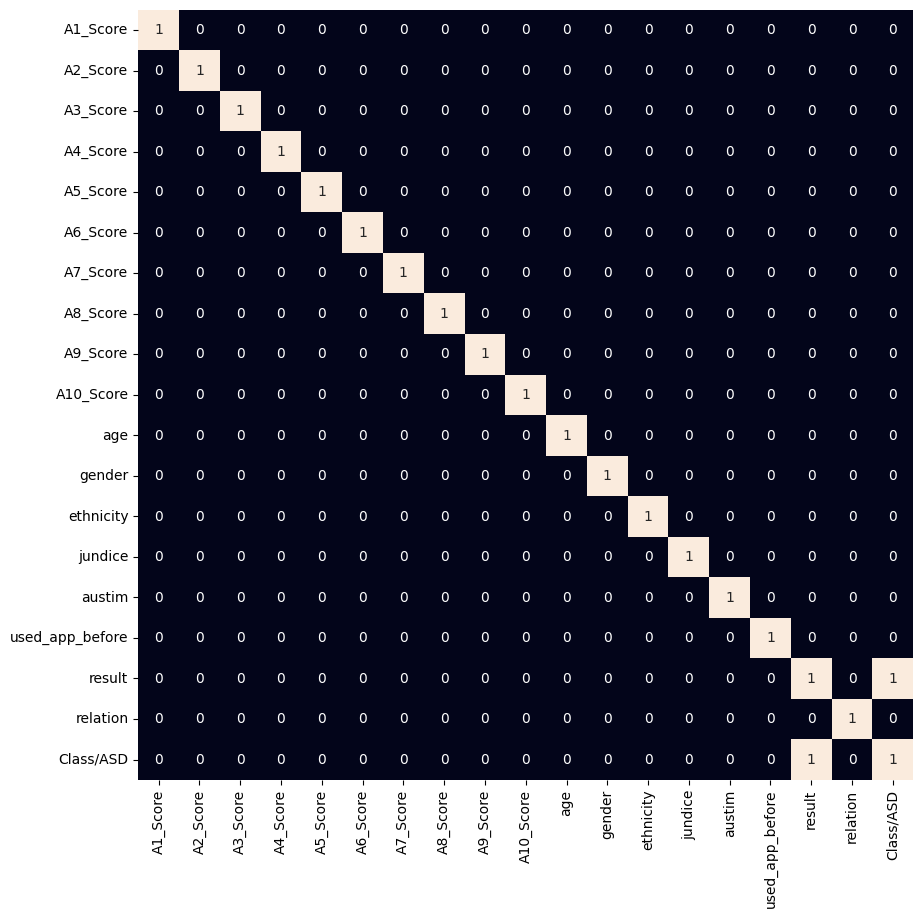

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(ndf.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [30]:
X = ndf.drop(["Class/ASD"], axis=1)
y = ndf["Class/ASD"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
roc_auc_score(y_test, y_pred)

1.0

In [35]:
ndf.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'used_app_before', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [36]:
ndf.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,9,0,0,0,6,4,0
1,1,1,0,1,0,0,0,1,0,1,24,1,3,0,1,0,5,4,0
2,1,1,0,1,1,0,1,1,1,1,27,1,3,1,1,0,8,2,1
3,1,1,0,1,0,0,1,1,0,1,35,0,9,0,1,0,6,4,0
4,1,0,0,0,0,0,0,1,0,0,40,0,5,0,0,0,2,1,0


In [37]:
test = np.array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 32, 1, 9, 0, 0, 0, 6, 4]])

In [38]:
logreg.predict(test)

array([0], dtype=int64)

In [ ]:
pickle.dump(logreg, open("logreg.pkl", "wb"))